**Task:**

Conduct RFM-analysis
- vip (started buying a long time ago, buy often, have a high average bill);
- constant audience (started buying a long time ago, buy with a certain frequency, have the average bill that is not lower than the average for all users);
- new users (bought something recently, the average bill is to be determined).

- dimension12 - user id
- date - session and transaction date
- ga:transactions - purchase
- ga:transactionRevenue - revenue

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (15,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset3.csv', index_col=0)
df

,dimension12,date,transactions,transactionRevenue
1,0cee3912-62d7-497c-74cc-de5d4d243625,2020-04-01,0,0.0
2,0e145107-36a6-091a-edc7-047b395fb224,2020-04-01,0,0.0
3,1000018370.1585198172,2020-04-01,0,0.0
4,1000028568.1585761942,2020-04-01,0,0.0
5,1000084732.1585721148,2020-04-01,0,0.0
...,...,...,...,...
2348203,999959210.1593477490,2020-06-30,0,0.0
2348204,999974081.1593509838,2020-06-30,0,0.0
2348205,999977883.1593487375,2020-06-30,0,0.0
2348206,e607dcc6-4ed3-b2db-21e3-28d01aabe564,2020-06-30,0,0.0


In [3]:
df=df.drop(df[df['dimension12']=='function%252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252520%25252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525'].index)

In [4]:
df.dropna(axis=0,inplace=True)
df=df[['dimension12','date','transactions', 'transactionRevenue']].drop_duplicates()

In [5]:
df.rename(columns= {'dimension12':'cid','transactionRevenue': 'monetary'}, inplace=True)
df.head()

,cid,date,transactions,monetary
1,0cee3912-62d7-497c-74cc-de5d4d243625,2020-04-01,0,0.0
2,0e145107-36a6-091a-edc7-047b395fb224,2020-04-01,0,0.0
3,1000018370.1585198172,2020-04-01,0,0.0
4,1000028568.1585761942,2020-04-01,0,0.0
5,1000084732.1585721148,2020-04-01,0,0.0


In [6]:
df.isna().sum()

cid             0
date            0
transactions    0
monetary        0
dtype: int64

In [7]:
'(other)' in df.cid.unique()

True

In [8]:
df=df[df['cid']!='(other)']

In [9]:
print('Sessions:',len(df), 'With purchases:', round(len(df[df['transactions']>0])/len(df)*100,2),'%', ' or:', len(df[df['transactions']>0]))

Sessions: 2348193 With purchases: 1.92 %  or: 44982


In [11]:
print('Sessions with purchases:',len(df[df['transactions']>0]), 'Repeated:', round(len(df[df['transactions']>1])/len(df[df['transactions']>0])*100,2),'%', ' or:', len(df[df['transactions']>1]))

Sessions with purchases: 44982 Repeated: 6.56 %  or: 2949


In [12]:
df=df[df['transactions']>0]
df

,cid,date,transactions,monetary
40,1002336906.1585729794,2020-04-01,1,6433.0
111,1008541452.1585737565,2020-04-01,1,5799.0
115,1008926362.1585732954,2020-04-01,1,5759.0
134,1010118525.1585294807,2020-04-01,1,1678.0
392,1027996752.1584087242,2020-04-01,1,3137.0
...,...,...,...,...
2347999,989350260.1593448072,2020-06-30,1,3555.0
2348039,991177232.1593504531,2020-06-30,1,1283.0
2348095,994517415.1589728137,2020-06-30,1,6119.0
2348123,996118675.1593544501,2020-06-30,1,810.0


In [13]:
print('Typical purchase sum: ', df.monetary.median() )

Typical purchase sum:  3429.0


**date format in date column**

In [14]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True ) #format='%Y%m%d'

In [15]:
df.iloc[0]['date']

Timestamp('2020-04-01 00:00:00')

In [16]:
today=pd.to_datetime('2020-07-01') # timestep # pd.Timestamp('now')

# (today-df.iloc[0]['date']).dt.days

In [17]:
df['recency'] = pd.to_datetime(df['date']).rsub(today.floor('d')).dt.days
df

,cid,date,transactions,monetary,recency
40,1002336906.1585729794,2020-04-01,1,6433.0,91
111,1008541452.1585737565,2020-04-01,1,5799.0,91
115,1008926362.1585732954,2020-04-01,1,5759.0,91
134,1010118525.1585294807,2020-04-01,1,1678.0,91
392,1027996752.1584087242,2020-04-01,1,3137.0,91
...,...,...,...,...,...
2347999,989350260.1593448072,2020-06-30,1,3555.0,1
2348039,991177232.1593504531,2020-06-30,1,1283.0,1
2348095,994517415.1589728137,2020-06-30,1,6119.0,1
2348123,996118675.1593544501,2020-06-30,1,810.0,1


In [18]:
del df['date']

In [19]:
df.head()

,cid,transactions,monetary,recency
40,1002336906.1585729794,1,6433.0,91
111,1008541452.1585737565,1,5799.0,91
115,1008926362.1585732954,1,5759.0,91
134,1010118525.1585294807,1,1678.0,91
392,1027996752.1584087242,1,3137.0,91


In [20]:
df.monetary.median()

3429.0

In [21]:
df.monetary.mean()

4858.588901338313

In [22]:
max(df.monetary)

174735.0

In [23]:
df[df['cid']=='686283008.1587884942']['monetary'].sum() 

72098.0

**Check top 1%**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F351828>,
      dtype=object)

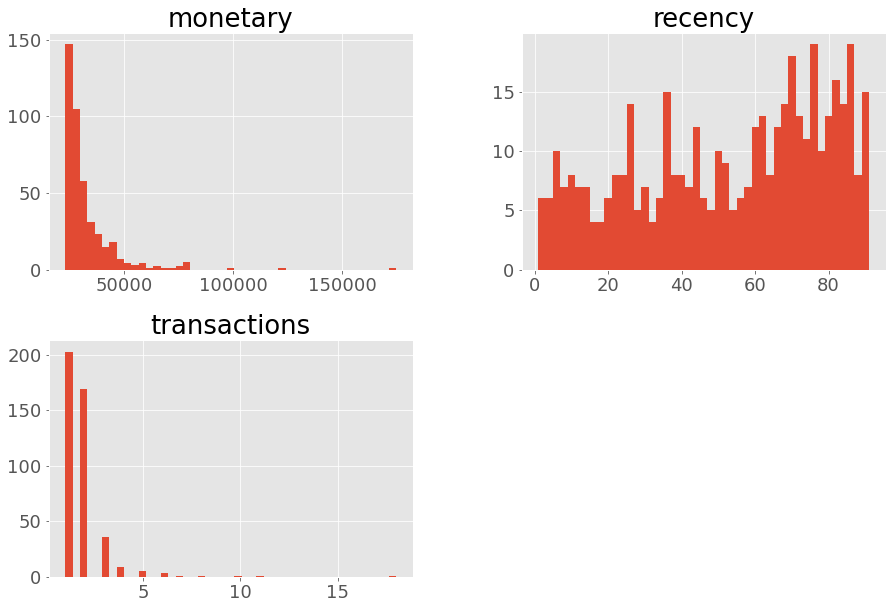

In [24]:
df[df['monetary']>df['monetary'].quantile(0.99)].hist(bins=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F2EBC50>,
      dtype=object)

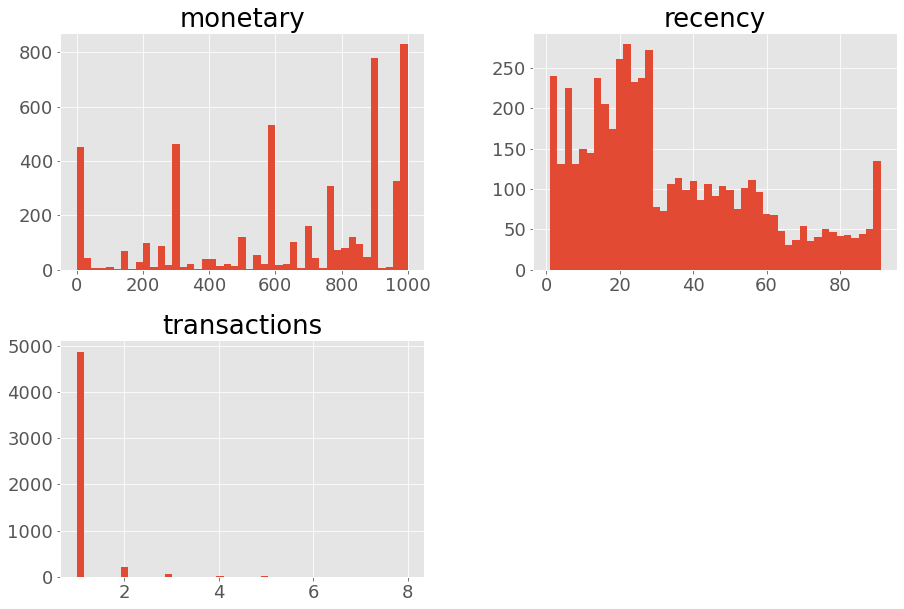

In [25]:
df[df['monetary']<1000].hist(bins=45)

In [26]:
df[(df['monetary']<10) & (df['monetary']>0) & (df['transactions']==1)]

,cid,transactions,monetary,recency
1105919,1450226213.1588615957,1,1.0,48
1107157,1536942500.1589472645,1,1.0,48
1108805,1645283006.1588852402,1,1.0,48
1112868,1910555044.1586937999,1,1.0,48
1122561,63390222.1584711566,1,1.0,48
...,...,...,...,...
2334448,223022737.1584908162,1,3.0,1
2336223,32139568.1593525524,1,1.0,1
2340587,570693926.1587462235,1,1.0,1
2341229,605862310.1593536556,1,1.0,1


306 purchases in one transaction with the bill < 10 RUB.

**RFM**

Removing Top 1% record for analysis (as they might skew the analysis), these customers can be studied separately, if they are outliers or genuine bulk buyers.

In [33]:
# recency_cleaned = df[df['recency']<df['recency'].quantile(0.99)]
# frequency_cleaned = df[df['transactions']<df['transactions'].quantile(0.99)]
# monetary_cleaned = df[df['monetary']<df['monetary'].quantile(0.99)]
# #Merging three dataframes to create rfm table
# rfm_table=pd.merge(pd.merge(recency_cleaned[['cid','recency','transactions','monetary']],frequency_cleaned[['cid']],on='cid'),monetary_cleaned[['cid']],on='cid')

In [35]:
# max(rfm_table.monetary)

In [36]:
df['monetary'].quantile(0.99)

22899.0

In [37]:
df['monetary'].sort_values(ascending=False)

63773      174735.0
173375     122485.0
2327615     97404.0
258340      79487.0
490543      79326.0
             ...   
837828          0.0
938791          0.0
983001          0.0
949675          0.0
908057          0.0
Name: monetary, Length: 44982, dtype: float64

In [39]:
# monetary_cleaned.monetary.sort_values(ascending=False)

In [40]:
rfmTable=df.copy()

In [41]:
rfmTable.drop(rfmTable.loc[rfmTable.cid=='function%252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252520%25252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525'].index, inplace=True)

In [42]:
# remove top 1%
rfmTable=rfmTable[rfmTable['recency']<rfmTable['recency'].quantile(0.99)]
rfmTable=rfmTable[rfmTable['transactions']<rfmTable['transactions'].quantile(0.99)]
rfmTable=rfmTable[rfmTable['monetary']<rfmTable['monetary'].quantile(0.99)]

Recency - min date, transactions and monetary - sum.

In [43]:
rfmTable = rfmTable.groupby('cid').agg({'recency': lambda x: x.min(), # Recency
                                        'transactions': lambda x: x.sum(),               # Frequency
                                        'monetary': lambda x: x.sum()}).reset_index() 

rfmTable.rename(columns={ 'transactions': 'frequency'}, inplace=True)

In [45]:
print('Max: ',max(rfmTable.monetary), 'Min: ', min(rfmTable.monetary), 'Median: ', rfmTable.monetary.median())

Max:  85322.0 Min:  0.0 Median:  3431.5


In [46]:
rfmTable

,cid,recency,frequency,monetary
0,010da180-4a11-141b-a75d-54dcb1f6f8f1,79,1,4048.0
1,0bd6bd97-4b6e-dcf1-2d9a-f36b543c1680,18,1,7474.0
2,0cee3912-62d7-497c-74cc-de5d4d243625,1,1,1020.0
3,1000018370.1585198172,7,1,299.0
4,1000035401.1591451100,25,1,1711.0
...,...,...,...,...
38713,999905829.1590502795,36,1,6480.0
38714,a2bc5dc7-d373-dff1-ffe6-5c3410fcb3a2,59,1,7217.0
38715,ca9fa0bb-ffbb-d8a9-2d40-d41abfe66e95,7,1,1959.0
38716,d4275fcf-dc38-721b-cdaa-d8e1f49136b5,54,1,13799.0


In [47]:
len(df.cid.unique())

42036

In [48]:
from sklearn import preprocessing

rfm2=rfmTable.copy()
rfm2=rfm2.set_index('cid')
norm = preprocessing.StandardScaler()
norm.fit(rfm2)
X = norm.transform(rfm2)

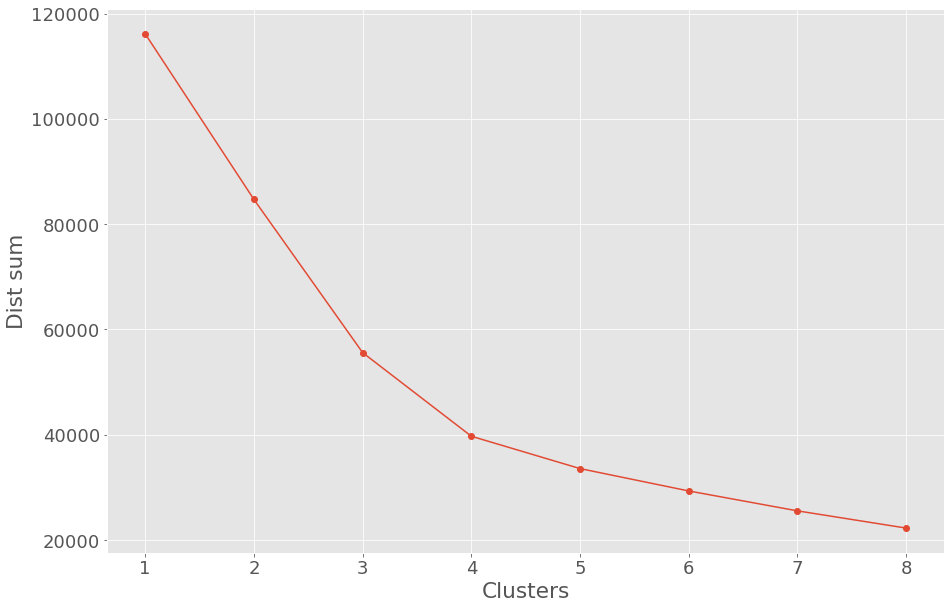

In [49]:
from sklearn.cluster import KMeans

K = range(1, 9)
models = [KMeans(n_clusters=k).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dist sum')
plt.show()

Ok. Got 4 clusters. However, calculations were made using 3 and for clusters and the result was approx the same. Taking 3 clusters is less expensive:

In [50]:
rfm2=rfmTable.copy()
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm2)
rfm2['cluster'] = model.labels_
rfm2.groupby('cluster').mean()

,recency,frequency,monetary
cluster,,,
0,45.333424,1.068959,6357.800855
1,39.265172,1.030959,2175.423407
2,48.257478,1.186408,13689.347449


3 clusters

In [51]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
#     df_final['cid']=df['cid']
    return df_final

#Recency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfmTable[['recency']])
rfmTable['RecencyCluster']=kmeans.predict(rfmTable[['recency']])
rfmTable = order_cluster('RecencyCluster','recency', rfmTable, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfmTable[['frequency']])
rfmTable['FrequencyCluster']=kmeans.predict(rfmTable[['frequency']])
rfmTable = order_cluster('FrequencyCluster','frequency', rfmTable, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfmTable[['monetary']])
rfmTable['MonetaryCluster']=kmeans.predict(rfmTable[['monetary']])
rfmTable = order_cluster('MonetaryCluster','monetary', rfmTable, True)

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating Recency Custer Tag Column
c=rfmTable.groupby('RecencyCluster')['recency'].agg(['min','max','median']).reset_index()
r1='<='+str(c.iloc[2,2]) 
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2]) 
r3='>='+str(c.iloc[0,1])
# Create the dictionary 
R ={0 : r3, 1 : r2, 2 : r1} 
rfmTable['RecencyClusterTag']=rfmTable['RecencyCluster'].apply(set_value, args =(R, )) 

# Creating Frequency Custer Tag Column
a=rfmTable.groupby('FrequencyCluster')['frequency'].agg(['min','max','median']).reset_index()
f1='<='+str(a.iloc[0,2]) 
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2]) 
f3='>='+str(a.iloc[2,1])
# Create the dictionary 
F ={0 : f1, 1 : f2, 2 :f3} 
rfmTable['FrequencyClusterTag']=rfmTable['FrequencyCluster'].apply(set_value, args =(F, )) 

# Creating Monetary Custer Tag Column
b=rfmTable.groupby('MonetaryCluster')['monetary'].agg(['min','max','median']).reset_index()
m1='<='+str(int(round(b.iloc[0,2]))) 
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2]))) 
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary 
M ={0 : m1, 1 : m2, 2 :m3} 
rfmTable['MonetaryClusterTag']=rfmTable['MonetaryCluster'].apply(set_value, args =(M, )) 

rfmTable["FrequencyClusterTag"] = rfmTable["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
rfmTable["MonetaryClusterTag"] = rfmTable["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
rfmTable["RecencyClusterTag"] = rfmTable["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))


In [52]:
b

,MonetaryCluster,min,max,median
0,0,0.0,4259.0,1999.0
1,1,4267.0,9989.0,5999.0
2,2,9995.0,85322.0,12748.0


In [53]:
rfmTable

,cid,recency,frequency,monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag
0,010da180-4a11-141b-a75d-54dcb1f6f8f1,79,1,4048.0,0,0,0,>=60,<=1,<=4259
1,1000674534.1588101303,64,1,3499.0,0,0,0,>=60,<=1,<=4259
2,1001031570.1586261140,76,1,3800.0,0,0,0,>=60,<=1,<=4259
3,1001640183.1588135561,63,1,4157.0,0,0,0,>=60,<=1,<=4259
4,1002242630.1586081772,87,1,2449.0,0,0,0,>=60,<=1,<=4259
...,...,...,...,...,...,...,...,...,...,...
38713,681981489.1526907868,55,3,29887.0,1,2,2,31 to 59,>=3,>=9990
38714,704618424.1586420263,56,4,24377.0,1,2,2,31 to 59,>=3,>=9990
38715,739643835.1585809709,47,3,18157.0,1,2,2,31 to 59,>=3,>=9990
38716,82181370.1583573450,48,3,34006.0,1,2,2,31 to 59,>=3,>=9990


In [54]:
rfmTable['RFMClass'] = rfmTable.RecencyCluster.map(str) \
                            + rfmTable.FrequencyCluster.map(str) \
                            + rfmTable.MonetaryCluster.map(str)

In [55]:
rfmTable

,cid,recency,frequency,monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag,RFMClass
0,010da180-4a11-141b-a75d-54dcb1f6f8f1,79,1,4048.0,0,0,0,>=60,<=1,<=4259,000
1,1000674534.1588101303,64,1,3499.0,0,0,0,>=60,<=1,<=4259,000
2,1001031570.1586261140,76,1,3800.0,0,0,0,>=60,<=1,<=4259,000
3,1001640183.1588135561,63,1,4157.0,0,0,0,>=60,<=1,<=4259,000
4,1002242630.1586081772,87,1,2449.0,0,0,0,>=60,<=1,<=4259,000
...,...,...,...,...,...,...,...,...,...,...,...
38713,681981489.1526907868,55,3,29887.0,1,2,2,31 to 59,>=3,>=9990,122
38714,704618424.1586420263,56,4,24377.0,1,2,2,31 to 59,>=3,>=9990,122
38715,739643835.1585809709,47,3,18157.0,1,2,2,31 to 59,>=3,>=9990,122
38716,82181370.1583573450,48,3,34006.0,1,2,2,31 to 59,>=3,>=9990,122


In [56]:
rfmTable.to_csv('rfmclusters.csv', encoding='utf-16', sep='\t')

In [57]:
rfmTable[rfmTable['RecencyCluster']==2]['monetary'].median()

2771.0

In [58]:
len(rfmTable.cid.unique())

38718

Text(0, 0.5, 'Amount')

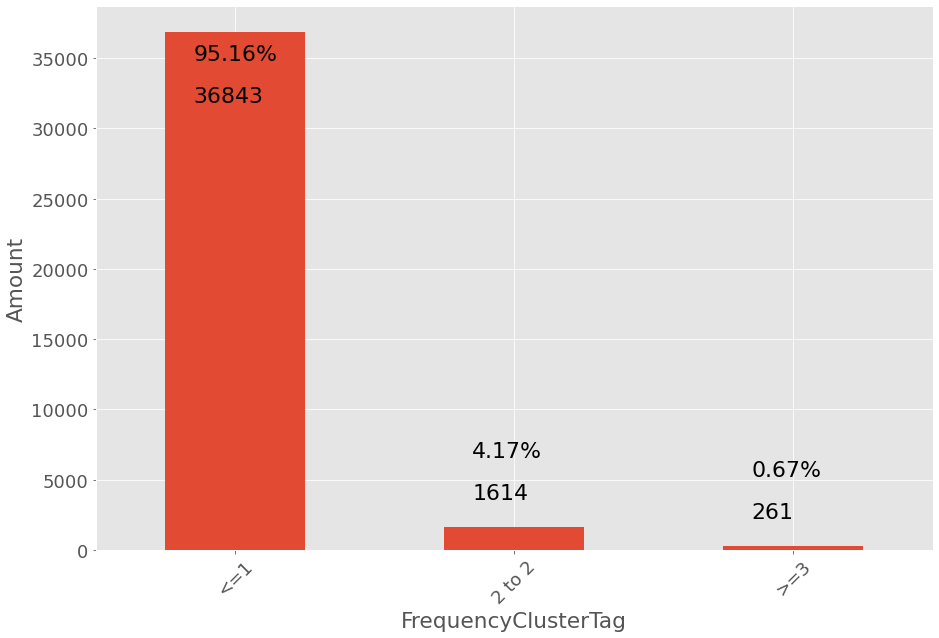

In [59]:
ax = rfmTable.groupby('FrequencyClusterTag')['cid'].count().plot.bar()

totals=[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

kk=0
for i in ax.patches:
    if kk==0:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.1, i.get_height()-2000, str(round((i.get_height()/total)*100, 2))+'%', fontsize=22, color='black')
        ax.text(i.get_x()+0.1, i.get_height()-5000, str(int(i.get_height())), fontsize=22, color='black')
    else:
        ax.text(i.get_x()+0.1, i.get_height()+5000, str(round((i.get_height()/total)*100, 2))+'%', fontsize=22, color='black')
        ax.text(i.get_x()+0.1, i.get_height()+2000, str(int(i.get_height())), fontsize=22, color='black')
    kk+=1
    
plt.xticks(rotation=45)
ax.set_ylabel('Amount')

4 clusters

In [61]:
# quartiles = rfm2.quantile(q=[0.25,0.50,0.75])
# print(quartiles, type(quartiles))

In [62]:
# quartiles=quartiles.to_dict()
# quartiles

In [443]:
# ## for Recency 

# def RClass(x,p,d):
#     if x <= d[p][0.25]:
#         return 1
#     elif x <= d[p][0.50]:
#         return 2
#     elif x <= d[p][0.75]: 
#         return 3
#     else:
#         return 4
    
# ## for Frequency and Monetary value 

# def FMClass(x,p,d):
#     if x <= d[p][0.25]:
#         return 4
#     elif x <= d[p][0.50]:
#         return 3
#     elif x <= d[p][0.75]: 
#         return 2
#     else:
#         return 1    

In [444]:
# rfmSeg = rfm2
# rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
# rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
# rfmSeg['M_Quartile'] = rfmSeg['monetary'].apply(FMClass, args=('monetary',quartiles,))

In [445]:
# rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
#                             + rfmSeg.F_Quartile.map(str) \
#                             + rfmSeg.M_Quartile.map(str)

In [63]:
# rfmSeg

In [64]:
# rfmSeg.sort_values(by=['RFMClass', 'monetary'], ascending=[True, False])

In [65]:
# rfmSeg['F_Quartile'].hist()

In [66]:
# len(rfmSeg[rfmSeg['M_Quartile']==2])

In [67]:
# ax = rfmSeg.groupby('R_Quartile')['cid'].count().plot.bar()

# totals=[]
# for i in ax.patches:
#     totals.append(i.get_height())

# total = sum(totals)

# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+0.1, i.get_height()-1000, str(round((i.get_height()/total)*100, 2))+'%', fontsize=22, color='white')
#     ax.text(i.get_x()+0.1, i.get_height()-2000, str(int(i.get_height())), fontsize=22, color='white')
    
# plt.xticks(rotation=45)
# ax.set_ylabel('Users amount')

In [68]:
# rfmSeg.groupby('RFMClass').agg('monetary').median().plot(kind='bar', colormap='Blues_r')

In [69]:
# rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
# print(rfmSeg.head(), rfmSeg.info())

In [70]:
# rfmSeg.groupby('Total Score').agg('monetary').mean()

In [71]:
# rfmSeg.groupby('Total Score').agg('monetary').median().plot(kind='bar', colormap='Blues_r')

In [72]:
# rfmSeg

In [73]:
# Best Recency score = 1: most recently purchase.
# Best Frequency score = 1: most quantity purchase. 
# Best Monetary score = 1: spent the most.

# rfmSeg[rfmSeg['RFMClass']=='111'].sort_values('monetary', ascending=False).head(10)

In [74]:
# print("Best Customers: ",len(rfmSeg[rfmSeg['RFMClass']=='111']))
# print('Loyal Customers: ',len(rfmSeg[rfmSeg['F_Quartile']==1]))
# print("Big Spenders: ",len(rfmSeg[rfmSeg['M_Quartile']==1]))
# print('Almost Lost: ', len(rfmSeg[rfmSeg['RFMClass']=='311']))
# print('Lost Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='411']))
# print('Lost Cheap Customers: ',len(rfmSeg[rfmSeg['RFMClass']=='444']))